#### Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Reading the `Petrol Price Dataset`

In [2]:
df = pd.read_csv("Petrol Dataset June 20 2022.csv", encoding='latin-1', index_col=1)
df = df.drop(columns="#")

In [3]:
df.tail()

,Daily Oil Consumption (Barrels),World Share,Yearly Gallons Per Capita,Price Per Gallon (USD),Price Per Liter (USD),Price Per Liter (PKR)
Country,,,,,,
Saint Pierre & Miquelon,660,0.00%,1705.1,8.27,2.19,462.13
Kiribati,400,0.00%,54.5,4.09,1.08,228.42
Montserrat,400,0.00%,1231.1,4.57,1.21,255.07
Saint Helena,70,0.00%,180.2,5.53,1.46,309.21
Niue,51,0.00%,484.4,11.43,3.02,638.73


#### Checking Data's dtypes and whether their exists any null value

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 181 entries, United States to Niue
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Daily Oil Consumption (Barrels)  181 non-null    int64  
 1   World Share                      181 non-null    object 
 2   Yearly Gallons Per Capita        181 non-null    float64
 3   Price Per Gallon (USD)           181 non-null    float64
 4   Price Per Liter (USD)            181 non-null    float64
 5   Price Per Liter (PKR)            181 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 9.9+ KB


-> Dataset looks already `cleaned` but have some `mismatch` datatype (e.g. World Share) and some consumes more space

#### To `resolve` this, we are going to use `Klib` Python library.

In [5]:
import klib as kl;

#### First we are going to change `World Share` column to float by removing the `%` Sign.

In [6]:
def func(x):
    if x[-1]=="%":
        return x[:-1]
    else: return x


df["World Share"] = df["World Share"].apply(lambda x:  func(x))  
df = df.rename(columns= {"World Share" : "World Share (%)"})

In [7]:
# df = kl.convert_datatypes(df)
df["World Share (%)"] = pd.to_numeric(df["World Share (%)"])


#### Saving the current Progress into a new csv file

In [8]:
# df.to_csv("petrol_updated.csv")

#### Now Data is up to the mark to do further Analysis

In [9]:
df.head()

,Daily Oil Consumption (Barrels),World Share (%),Yearly Gallons Per Capita,Price Per Gallon (USD),Price Per Liter (USD),Price Per Liter (PKR)
Country,,,,,,
United States,19687287,20.3,934.3,5.19,1.37,289.97
China,12791553,13.2,138.7,5.42,1.43,302.87
India,4443000,4.6,51.4,5.05,1.33,281.93
Japan,4012877,4.1,481.5,4.69,1.24,262.05
Russia,3631287,3.7,383.2,3.41,0.90,190.56


## Feature Analysis

### Univariate Analysis

In [10]:
df.describe()

,Daily Oil Consumption (Barrels),World Share (%),Yearly Gallons Per Capita,Price Per Gallon (USD),Price Per Liter (USD),Price Per Liter (PKR)
count,1.810000e+02,181.000000,181.000000,181.000000,181.000000,181.000000
mean,5.335730e+05,0.550331,332.006630,5.695691,1.505138,318.219227
std,1.858067e+06,1.916530,436.558735,4.370484,1.154575,244.192081
min,5.100000e+01,0.000000,2.200000,0.080000,0.020000,4.650000
25%,2.003600e+04,0.020000,53.900000,4.150000,1.100000,232.020000
50%,6.161200e+04,0.060000,180.200000,5.280000,1.400000,295.040000
75%,2.623520e+05,0.300000,424.600000,6.760000,1.790000,377.740000
max,1.968729e+07,20.300000,3679.500000,54.890000,14.500000,3066.750000


#### Plotting `Histogram` of every feature to check the `Normal distribution`

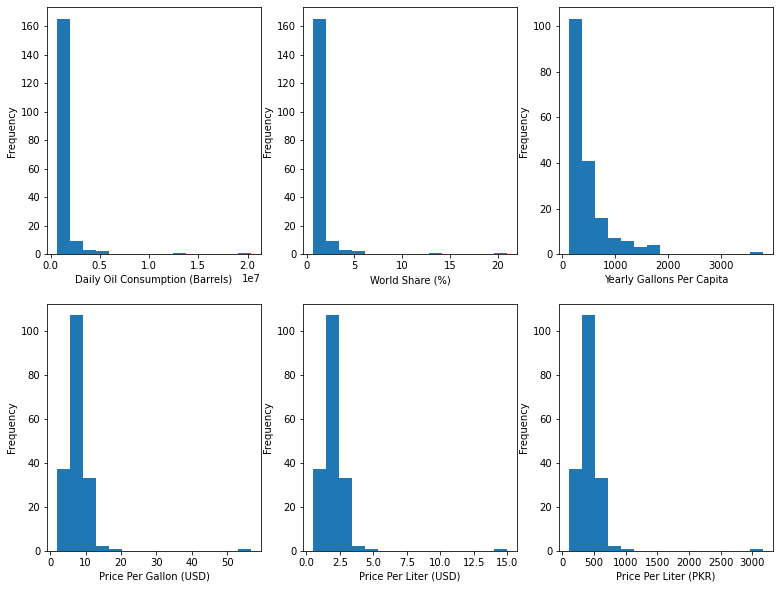

In [28]:
fig, axes = plt.subplots(2,3, figsize=(13,10))
for i,feature in enumerate(df.columns):
    axes[i//3, i%3].hist(df[feature], bins = 15, align = "right")
    axes[i//3, i%3].set_xlabel(feature)
    axes[i//3, i%3].set_ylabel("Frequency")
    
# plt.hist()
plt.show()

By this we can clearly see that the data features is not normally distributed. But for further testing, we will be plotting the QQplot

### Quantile – Quantile plot

In [29]:
import statsmodels.api as sm
import pylab as py

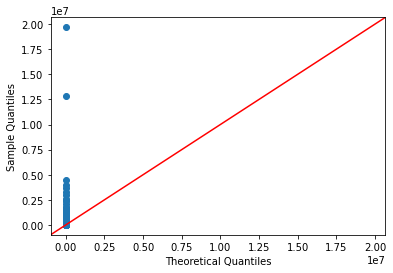

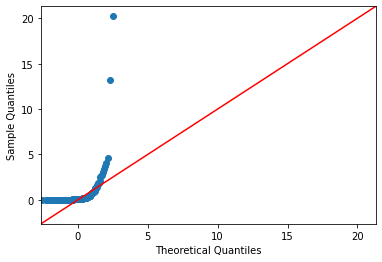

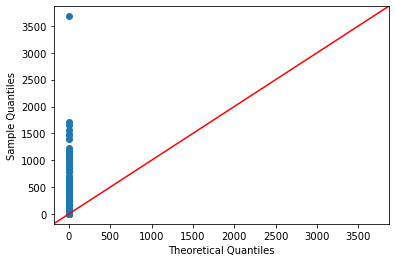

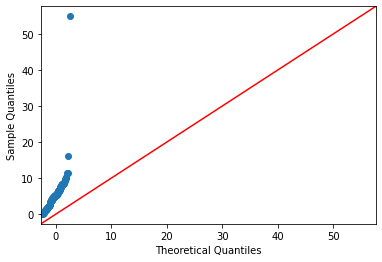

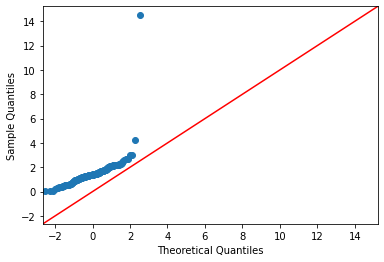

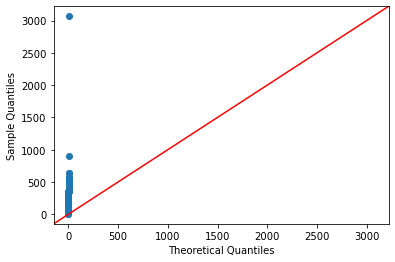

In [35]:
for i,feature in enumerate(df.columns):
    sm.qqplot(df[feature], line ='45')
    py.show()

so clearly, qqplot confirms that data is not normally distributed

### Factors affecting the Petrol Price per liter


#### Comparsion between Daliy Oil Comsumption and Price Per liter of random Countries

In [12]:
countries = np.array(df.index)         #Storing an array for countries name.
selected_countries = np.random.choice(countries, 50)     # random selection of countries

In [13]:
# print(selected_countries)

In [14]:
# for country in selected_countries:
#     pos = df.loc[country]
#     plt.scatter( pos["Price Per Liter (USD)"], pos["Daily Oil Consumption (Barrels)"], label = country  )
        
# plt.legend()
# plt.xlabel("Price Per Liter (USD")
# plt.title("Daliy Oil Comsumption Vs Price Per liter (USD)")
# plt.ylabel("Daily Oil Consumption (Barrels)")

# plt.show()